<a href="https://colab.research.google.com/github/hydro-7/Segmentation_Notebooks/blob/main/Seg_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pretrained -> **fcn_resnet101** or **deeplabsv3_resnet101**


# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Import Libraries**

In [1]:
from torchvision import models

# **Selecting Pretrained Model**

In [2]:
#Load FCN_ResNet encoder decoder architecture
SegModel=models.segmentation.fcn_resnet101(pretrained=True).eval()

#OR load DeepLabV3_ResNet encoder decoder architecture
#SegModel=models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:03<00:00, 60.3MB/s]


# **Load the Image**

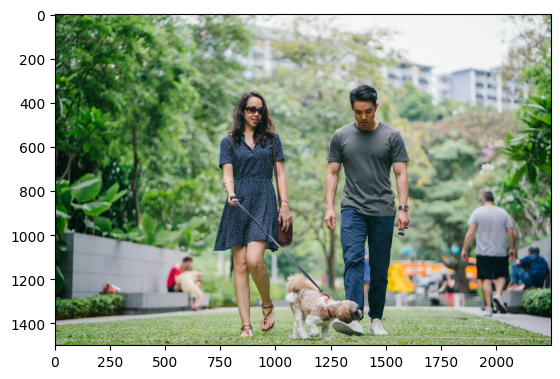

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np

#Load Input image from google drive to Colab
#Load Car Image
#img = Image.open('/content/drive/My Drive/Colab Notebooks/Segmentation/car.jpg')

#OR load Image with multiple Objects persons and dog
img = Image.open('/content/person.jpeg')

plt.imshow(img); plt.show()

# **Image Preprocessing**

In [4]:
#Define Transformations
import torchvision.transforms as T
trf = T.Compose([T.Resize(512),
                 T.CenterCrop(512),
                 T.ToTensor(),
                 T.Normalize(mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

# **Predicting Output**

In [5]:
#Predict the output
out = SegModel(inp)['out']

predicted = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (np.unique(predicted))

#coco dataset classes on which the models has been trained
class_labels = [
    "background", "aeroplane", "bicycle", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow", "dining table", "dog", "horse",
    "motorbike", "person", "potted plant", "sheep", "sofa", "train", "tv/monitor"]

# Convert predicted indices to class names
predicted_classes = [class_labels[idx] for idx in np.unique(predicted)]

# Print the predicted class names
print(predicted_classes)


[ 0 12 15]
['background', 'dog', 'person']


# **Creating the Seg-Map**

In [6]:
#The decode_segmap function is defined to convert the segmented image to an RGB image. The final segmented RGB image is then displayed using matplotlib.

def decode_segmap(image, nc=21):

  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)

  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]

  rgb = np.stack([r, g, b], axis=2)
  return rgb

# **Final Output**

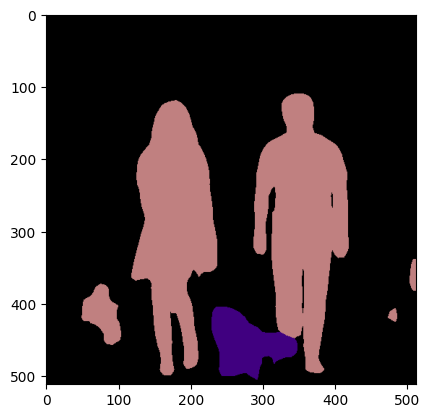

In [7]:
rgb = decode_segmap(predicted)
plt.imshow(rgb); plt.show()